In [57]:
!sudo pip2.7 install numpy

[sudo] password for bala: 


In [ ]:
## all imports
from IPython.display import HTML
import numpy as np
import urllib2
import bs4 #this is beautiful soup
import time
import operator
import socket
import cPickle
import re # regular expressions

from pandas import Series
import pandas as pd
from pandas import DataFrame

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_context("talk")
sns.set_style("white")

from secret import *

<h2>How to load a table</h2>
<ul>
<li>we use Pandas for this
<li>Pandas can do a lot more
<li>more about it later
</ul>

<h2>The MovieLens data</h2>

http://grouplens.org/datasets/movielens/

<h3>Read the user data</h3>

In [1]:
# pass in column names for each CSV
u_cols = ['user_id', 'age', 'sex', 'occupation', 'zip_code']

users = pd.read_csv(
    'http://files.grouplens.org/datasets/movielens/ml-100k/u.user', 
    sep='|', names=u_cols)

users.head()

NameError: name 'pd' is not defined

Read the ratings
============

In [ ]:
r_cols = ['user_id', 'movie_id', 'rating', 'unix_timestamp']
ratings = pd.read_csv(
    'http://files.grouplens.org/datasets/movielens/ml-100k/u.data', 
    sep='\t', names=r_cols)

ratings.head() 

Now data about the movies
=========================

In [ ]:
# the movies file contains columns indicating the movie's genres
# let's only load the first five columns of the file with usecols
m_cols = ['movie_id', 'title', 'r
          
          elease_date', 
            'video_release_date', 'imdb_url']

movies = pd.read_csv(
    'http://files.grouplens.org/datasets/movielens/ml-100k/u.item', 
    sep='|', names=m_cols, usecols=range(5))

movies.head()

Get information about data
=======================

In [ ]:
print(movies.dtypes)
print()
print(movies.describe())
# *** Why only those two columns? ***

Selecting data
==============

* DataFrame => group of Series with shared index
* single DataFrame column => Series

In [6]:
print users.head()
print
print users['occupation'].head()
print
columns_you_want = ['occupation', 'sex'] 
print(users[columns_you_want].head())

NameError: name 'users' is not defined

Filtering data
==============

Select users older than 25

In [27]:
users.iloc[3]

user_id                4
age                   24
sex                    M
occupation    technician
zip_code           43537
Name: 3, dtype: object

In [28]:
oldUsers = users[users.age > 25]
oldUsers.head()

user_id  age sex     occupation zip_code
1        2   53   F          other    94043
4        5   33   F          other    15213
5        6   42   M      executive    98101
6        7   57   M  administrator    91344
7        8   36   M  administrator    05201

Quiz:
=====

* show users aged 40 and male

* show the mean age of female programmers

In [29]:
# users aged 40 AND male
users[(users.age == 40) & (users.sex == 'M')].head(3)

user_id  age sex  occupation zip_code
18        19   40   M   librarian    02138
82        83   40   M       other    44133
115      116   40   M  healthcare    97232

In [32]:
## users who are female and programmers
selected_users = users[(users.sex == 'F') & 
                       (users.occupation == 'programmer')]

## show statistic summary
print selected_users.describe()
print

## alternatives:
print "Mean age of selected_users is ", selected_users.age.mean()
print "Mean age of selected_users is ", selected_users['age'].mean()

          user_id        age
count    6.000000   6.000000
mean   411.166667  32.166667
std    149.987222   5.115336
min    292.000000  26.000000
25%    313.000000  28.250000
50%    378.000000  32.000000
75%    416.750000  36.500000
max    698.000000  38.000000

Mean age of selected_users is  32.1666666667
Mean age of selected_users is  32.1666666667


Split-apply-combine
===================

* splitting the data into groups based on some criteria
* applying a function to each group independently
* combining the results into a data structure

Split-apply-combine
===================

<img src=http://i.imgur.com/yjNkiwL.png></img>

Find Diligent Users
===================

* split data per user ID
* count ratings
* combine result

In [37]:
print ratings.head()
print

grouped_data = ratings.groupby('user_id')
print list(grouped_data)

   user_id  movie_id  rating  unix_timestamp
0      196       242       3       881250949
1      186       302       3       891717742
2       22       377       1       878887116
3      244        51       2       880606923
4      166       346       1       886397596

[(1,        user_id  movie_id  rating  unix_timestamp
202          1        61       4       878542420
305          1       189       3       888732928
333          1        33       4       878542699
334          1       160       4       875072547
478          1        20       4       887431883
639          1       202       5       875072442
687          1       171       5       889751711
820          1       265       4       878542441
933          1       155       2       878542201
972          1       117       3       874965739
1167         1        47       4       875072125
1299         1       222       4       878873388
1382         1       253       5       874965970
1440         1       113       5      

In [41]:
## split data
grouped_data = ratings['movie_id'].groupby(ratings['user_id'])
print(list(grouped_data))

[(1, 202       61
305      189
333       33
334      160
478       20
639      202
687      171
820      265
933      155
972      117
1167      47
1299     222
1382     253
1440     113
1617     227
1780      17
1989      90
2328      64
3049      92
3059     228
3171     266
3191     121
3234     114
3246     132
3248      74
3260     134
3358      98
3377     186
3431     221
3710      84
        ... 
74577    165
74847    116
75385    198
77073    124
77238     95
77630    217
78171     58
78695    142
78817    216
81463    126
81568     83
82444    231
82786    204
83307      3
84793    207
85377    244
85557     19
86585     29
87831     18
87967     59
88021     15
88259    111
88262     52
88893     88
89876     13
92049     28
92487    172
94019    122
96699    152
99073     94
Name: movie_id, Length: 272, dtype: int64), (2, 700      292
924      251
1052      50
3425     314
5063     297
5324     290
6310     312
7519     281
7973      13
8253     280
9201     303
9980     30

In [43]:
## count and combine
ratings_per_user = grouped_data.count()

ratings_per_user.head(5)

user_id
1    272
2     62
3     54
4     24
5    175
Name: movie_id, dtype: int64

Quiz
====

* get the average rating per movie
* advanced: get the movie titles with the highest average rating

In [45]:
## split data
grouped_data = ratings['rating'].groupby(ratings['movie_id'])
## average and combine
average_ratings = grouped_data.mean()
print "Average ratings:"
print average_ratings.head()
print

Average ratings:
movie_id
1    3.878319
2    3.206107
3    3.033333
4    3.550239
5    3.302326
Name: rating, dtype: float64



In [48]:
maximum_rating = average_ratings.max()
print "Maximum rating = ", maximum_rating

Maximum rating =  5.0


In [49]:
good_movie_ids = average_ratings[average_ratings == maximum_rating].index
print good_movie_ids

Int64Index([814, 1122, 1189, 1201, 1293, 1467, 1500, 1536, 1599, 1653], dtype='int64', name=u'movie_id')


In [50]:
print "Best movie titles"
print movies[movies.movie_id.isin(good_movie_ids)].title
print

Best movie titles
813                         Great Day in Harlem, A (1994)
1121                       They Made Me a Criminal (1939)
1188                                   Prefontaine (1997)
1200           Marlene Dietrich: Shadow and Light (1996) 
1292                                      Star Kid (1997)
1466                 Saint of Fort Washington, The (1993)
1499                            Santa with Muscles (1996)
1535                                 Aiqing wansui (1994)
1598                        Someone Else's America (1995)
1652    Entertaining Angels: The Dorothy Day Story (1996)
Name: title, dtype: object



<h2>Will you trust the above results if you have to pick a movie to watch?</h2/>

In [51]:
how_many_ratings = grouped_data.count()
print "Number of ratings per movie"
print how_many_ratings[average_ratings == maximum_rating]

Number of ratings per movie
movie_id
814     1
1122    1
1189    3
1201    1
1293    3
1467    2
1500    2
1536    1
1599    1
1653    1
Name: rating, dtype: int64


Passing a Function
==================


In [52]:
average_ratings = grouped_data.apply(lambda f: f.mean())
average_ratings.head()

movie_id
1    3.878319
2    3.206107
3    3.033333
4    3.550239
5    3.302326
Name: rating, dtype: float64

Quiz
====

* get the average rating per user
* advanced: list all occupations and if they are male or female dominant

In [53]:
grouped_data = ratings['rating'].groupby(ratings['user_id'])
average_ratings = grouped_data.mean()
average_ratings.head()

user_id
1    3.610294
2    3.709677
3    2.796296
4    4.333333
5    2.874286
Name: rating, dtype: float64

In [54]:
grouped_data = users['sex'].groupby(users['occupation'])
male_dominant_occupations = grouped_data.apply(lambda f: 
                                               sum(f == 'M') > sum(f == 'F'))
print male_dominant_occupations

occupation
administrator     True
artist            True
doctor            True
educator          True
engineer          True
entertainment     True
executive         True
healthcare       False
homemaker        False
lawyer            True
librarian        False
marketing         True
none              True
other             True
programmer        True
retired           True
salesman          True
scientist         True
student           True
technician        True
writer            True
Name: sex, dtype: bool


In [55]:
print 'number of male users: '
print sum(users['sex'] == 'M')

print 'number of female users: '
print sum(users['sex'] == 'F')

number of male users: 
670
number of female users: 
273


Python data scraping
====================

* Why scrape the web?
    - vast source of information
    - automate tasks
    - keep up with sites
    - fun!

** Can you think of examples ? **

Read and Tweet!
=================

* by Justin Blinder
* http://projects.justinblinder.com/We-Read-We-Tweet

“We Read, We Tweet” geographically visualizes the dissemination of New York Times articles through Twitter. Each line connects the location of a tweet to the contextual location of the New York Times article it referenced. The lines are generated in a sequence based on the time in which a tweet occurs. The project explores digital news distribution in a temporal and spatial context through the social space of Twitter.

Twitter Sentiments
=================

![TwitterSentiments](http://www.csc.ncsu.edu/faculty/healey/tweet_viz/figs/tweet-viz-ex.png
 "Twitter Sentiments")

* by Healey and Ramaswamy
* http://www.csc.ncsu.edu/faculty/healey/tweet_viz/tweet_app/

Type a keyword into the input field, then click the Query button. Recent tweets that contain your keyword are pulled from Twitter and visualized in the Sentiment tab as circles. Hover your mouse over a tweet or click on it to see its text.

Python data scraping
====================

* copyrights and permission:
    - be careful and polite
    - give credit
    - care about media law
    - don't be evil (no spam, overloading sites, etc.)

Robots.txt
==========

![Robots.txt](images/robots_txt.jpg "Robots.txt")

Robots.txt
==========

* specified by web site owner
* gives instructions to web robots (aka your script)
* is located at the top-level directory of the web server

http://www.example.com/robots.txt

If you want you can also have a look at

http://google.com/robots.txt

Robots.txt
==========

*** What does this one do? ***

Answer: This file allows google to search through everything on the server, while all others should stay completely away.

Things to consider:
-------------------

* can be just ignored
* can be a security risk - *** Why? ***

Answer: You are basically telling everybody who cares to look into the file where you have stored sensitive information.

Scraping with Python:
=====================

* scraping is all about HTML tags
* bad news: 
    - need to learn about tags
    - websites can be ugly

HTML
=====

* HyperText Markup Language

* standard for creating webpages

* HTML tags 
    - have angle brackets
    - typically come in pairs

This is an example for a minimal webpage defined in HTML tags. The root tag is `<html>` and then you have the `<head>` tag. This part of the page typically includes the title of the page and might also have other meta information like the author or keywords that are important for search engines. The `<body>` tag marks the actual content of the page. You can play around with the `<h2>` tag trying different header levels. They range from 1 to 6. 

In [101]:
htmlString = """<!DOCTYPE html>
<html>
  <head>
    <title>This is a title</title>
  </head>
  <body>
    <h2> Test </h2>
    <p>Hello world!</p>
  </body>
</html>"""

htmlOutput = HTML(htmlString)
htmlOutput

Useful Tags
===========

* heading
`<h1></h1> ... <h6></h6>`

* paragraph
`<p></p>` 

* line break
`<br>` 

* link with attribute

`<a href="http://www.example.com/">An example link</a>`


Scraping with Python:
=====================

* example of a beautifully simple webpage:

http://www.crummy.com/software/BeautifulSoup

Scraping with Python:
=====================

* good news: 
    - some browsers help
    - look for: inspect element
    - need only basic html


Scraping with Python
==================

* different useful libraries:
    - urllib
    - beautifulsoup
    - pattern
    - soupy
    - LXML
    - ...
    

The following cell just defines a url as a string and then reads the data from that url using the `urllib` library. If you uncomment the print command you see that we got the whole HTML content of the page into the string variable source.

In [59]:
url = 'http://www.crummy.com/software/BeautifulSoup'
source = urllib2.urlopen(url).read()
# print source

Quiz :
======

* Is the word 'Alice' mentioned on the beautiful soup homepage?
* How often does the word 'Soup' occur on the site?
    - hint: use `.count()`
* At what index occurs the substring 'alien video games' ?
    - hint: use `.find()`

In [62]:
## is 'Alice' in source?
print 'Alice' in source

False


In [63]:
## count occurences of 'Soup'
print source.count('Soup')

42


In [64]:
## find index of 'alien video games'
position =  source.find('alien video games')
print position

1639


In [66]:
## quick test to see the substring in the source variable
## you can access strings like lists
print source[position:position + 20]

alien video games</a


In [67]:
## or the tidier version:
print source[position:position + len('alien video games')]

alien video games


Beautiful Soup
==============

* designed to make your life easier
* many good functions for parsing html code

Some examples
=============


In [71]:
## get bs4 object
soup = bs4.BeautifulSoup(source)
 
## compare the two print statements
print soup
# print soup.prettify()

<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.0 Transitional//EN" "http://www.w3.org/TR/REC-html40/transitional.dtd">
<html>
<head>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<title>Beautiful Soup: We called him Tortoise because he taught us.</title>
<link href="mailto:leonardr@segfault.org" rev="made"/>
<link href="/nb/themes/Default/nb.css" rel="stylesheet" type="text/css"/>
<meta content="Beautiful Soup: a library designed for screen-scraping HTML and XML." name="Description"/>
<meta content="Markov Approximation 1.4 (module: leonardr)" name="generator"/>
<meta content="Leonard Richardson" name="author"/>
</head>
<body alink="red" bgcolor="white" link="blue" text="black" vlink="660066">
<img align="right" src="10.1.jpg" width="250"/><br/>
<p>You didn't write that awful page. You're just trying to get some
data out of it. Beautiful Soup is here to help. Since 2004, it's been
saving programmers hours or days of work on quick-turnaround
screen scraping projects.</

In [74]:
## show how to find all a tags
soup.findAll('a')

[<a href="bs4/download/"><h1>Beautiful Soup</h1></a>,
 <a href="#Download">Download</a>,
 <a href="bs4/doc/">Documentation</a>,
 <a href="#HallOfFame">Hall of Fame</a>,
 <a href="https://code.launchpad.net/beautifulsoup">Source</a>,
 <a href="https://groups.google.com/forum/?fromgroups#!forum/beautifulsoup">Discussion group</a>,
 <a href="http://www.candlemarkandgleam.com/shop/constellation-games/"><i>Constellation
 Games</i>, my sci-fi novel about alien video games</a>,
 <a href="http://constellation.crummy.com/Constellation%20Games%20excerpt.html">read
 the first two chapters for free</a>,
 <a href="https://groups.google.com/forum/?fromgroups#!forum/beautifulsoup">the discussion
 group</a>,
 <a href="https://bugs.launchpad.net/beautifulsoup/">file it</a>,
 <a href="http://lxml.de/">lxml</a>,
 <a href="http://code.google.com/p/html5lib/">html5lib</a>,
 <a href="bs4/doc/">Read more.</a>,
 <a name="Download"><h2>Download Beautiful Soup</h2></a>,
 <a href="bs4/download/">Beautiful Soup
 

In [75]:
## ***Why does this not work? ***
soup.findAll('Soup')

[]

The last command only returns an empty list, because `Soup` is not an HTML tag. It is just a string that occours in the webpage.

Some examples
=============

In [79]:
## get attribute value from an element:
## find tag: this only returns the first occurrence, not all tags in the string
first_tag = soup.find('a')
first_tag

<a href="bs4/download/"><h1>Beautiful Soup</h1></a>

In [80]:
## get attribute `href`
first_tag.get('href')

'bs4/download/'

In [81]:
## get all links in the page
link_list = [l.get('href') for l in soup.findAll('a')]
link_list

['bs4/download/',
 '#Download',
 'bs4/doc/',
 '#HallOfFame',
 'https://code.launchpad.net/beautifulsoup',
 'https://groups.google.com/forum/?fromgroups#!forum/beautifulsoup',
 'http://www.candlemarkandgleam.com/shop/constellation-games/',
 'http://constellation.crummy.com/Constellation%20Games%20excerpt.html',
 'https://groups.google.com/forum/?fromgroups#!forum/beautifulsoup',
 'https://bugs.launchpad.net/beautifulsoup/',
 'http://lxml.de/',
 'http://code.google.com/p/html5lib/',
 'bs4/doc/',
 None,
 'bs4/download/',
 'http://www.crummy.com/software/BeautifulSoup/bs3/documentation.html',
 'download/3.x/BeautifulSoup-3.2.1.tar.gz',
 None,
 'http://www.nytimes.com/2007/10/25/arts/design/25vide.html',
 'https://github.com/reddit/reddit/blob/85f9cff3e2ab9bb8f19b96acd8da4ebacc079f04/r2/r2/lib/media.py',
 'http://www.harrowell.org.uk/viktormap.html',
 'http://svn.python.org/view/tracker/importer/',
 'http://www2.ljworld.com/',
 'http://www.b-list.org/weblog/2010/nov/02/news-done-broke/',
 '

In [82]:
## filter all external links
# create an empty list to collect the valid links
external_links = []

# write a loop to filter the links
# if it starts with 'http' we are happy
for l in link_list:
    if l[:4] == 'http':
        external_links.append(l)

# this throws an error! It says something about 'NoneType'

TypeError: 'NoneType' object has no attribute '__getitem__'

In [85]:
# lets investigate. Have a close look at the link_list:
link_list

# Seems that there are None elements!
# Let's verify
sum([l is None for l in link_list])

# So there are two elements in the list that are None!

2

In [86]:
# Let's filter those objects out in the for loop
external_links = []

# write a loop to filter the links
# if it is not None and starts with 'http' we are happy
for l in link_list:
    if l is not None and l[:4] == 'http':
        external_links.append(l)
        
external_links

['https://code.launchpad.net/beautifulsoup',
 'https://groups.google.com/forum/?fromgroups#!forum/beautifulsoup',
 'http://www.candlemarkandgleam.com/shop/constellation-games/',
 'http://constellation.crummy.com/Constellation%20Games%20excerpt.html',
 'https://groups.google.com/forum/?fromgroups#!forum/beautifulsoup',
 'https://bugs.launchpad.net/beautifulsoup/',
 'http://lxml.de/',
 'http://code.google.com/p/html5lib/',
 'http://www.crummy.com/software/BeautifulSoup/bs3/documentation.html',
 'http://www.nytimes.com/2007/10/25/arts/design/25vide.html',
 'https://github.com/reddit/reddit/blob/85f9cff3e2ab9bb8f19b96acd8da4ebacc079f04/r2/r2/lib/media.py',
 'http://www.harrowell.org.uk/viktormap.html',
 'http://svn.python.org/view/tracker/importer/',
 'http://www2.ljworld.com/',
 'http://www.b-list.org/weblog/2010/nov/02/news-done-broke/',
 'http://esrl.noaa.gov/gsd/fab/',
 'http://laps.noaa.gov/topograbber/',
 'http://groups.google.com/group/beautifulsoup/',
 'https://launchpad.net/beauti

Note: The above `if` condition works because of lazy evaluation in Python. The `and` statement becomes `False` if the first part is `False`, so there is no need to ever evaluate the second part. Thus a `None` entry in the list gets never asked about its first four characters. 

In [87]:
# and we can put this in a list comprehension as well, it almost reads like 
# a sentence.

[l for l in link_list if l is not None and l.startswith('http')]

['https://code.launchpad.net/beautifulsoup',
 'https://groups.google.com/forum/?fromgroups#!forum/beautifulsoup',
 'http://www.candlemarkandgleam.com/shop/constellation-games/',
 'http://constellation.crummy.com/Constellation%20Games%20excerpt.html',
 'https://groups.google.com/forum/?fromgroups#!forum/beautifulsoup',
 'https://bugs.launchpad.net/beautifulsoup/',
 'http://lxml.de/',
 'http://code.google.com/p/html5lib/',
 'http://www.crummy.com/software/BeautifulSoup/bs3/documentation.html',
 'http://www.nytimes.com/2007/10/25/arts/design/25vide.html',
 'https://github.com/reddit/reddit/blob/85f9cff3e2ab9bb8f19b96acd8da4ebacc079f04/r2/r2/lib/media.py',
 'http://www.harrowell.org.uk/viktormap.html',
 'http://svn.python.org/view/tracker/importer/',
 'http://www2.ljworld.com/',
 'http://www.b-list.org/weblog/2010/nov/02/news-done-broke/',
 'http://esrl.noaa.gov/gsd/fab/',
 'http://laps.noaa.gov/topograbber/',
 'http://groups.google.com/group/beautifulsoup/',
 'https://launchpad.net/beauti

Parsing the Tree
================



In [88]:
# redifining `s` without any line breaks
s = """<!DOCTYPE html><html><head><title>This is a title</title></head><body><h3> Test </h3><p>Hello world!</p></body></html>"""
## get bs4 object
tree = bs4.BeautifulSoup(s)

## get html root node
root_node = tree.html
root_node

<html><head><title>This is a title</title></head><body><h3> Test </h3><p>Hello world!</p></body></html>

In [89]:
## get head from root using contents
head = root_node.contents[0]
head

<head><title>This is a title</title></head>

In [90]:
## get body from root
body = root_node.contents[1]
body

<body><h3> Test </h3><p>Hello world!</p></body>

In [91]:
## could directly access body
tree.body

<body><h3> Test </h3><p>Hello world!</p></body>

Quiz:
=====

* Find the `h3` tag by parsing the tree starting at `body`
* Create a list of all __Hall of Fame__ entries listed on the Beautiful Soup webpage
    - hint: it is the only unordered list in the page (tag `ul`)


In [92]:
## get h3 tag from body
body.contents[0]

<h3> Test </h3>

In [94]:
## use ul as entry point
entry_point = soup.find('ul')
entry_point

<ul>
<li><a href="http://www.nytimes.com/2007/10/25/arts/design/25vide.html">"Movable
 Type"</a>, a work of digital art on display in the lobby of the New
 York Times building, uses Beautiful Soup to scrape news feeds.

</li><li>Reddit uses Beautiful Soup to <a href="https://github.com/reddit/reddit/blob/85f9cff3e2ab9bb8f19b96acd8da4ebacc079f04/r2/r2/lib/media.py">parse
a page that's been linked to and find a representative image</a>.

</li><li>Alexander Harrowell uses Beautiful Soup to <a href="http://www.harrowell.org.uk/viktormap.html">track the business
 activities</a> of an arms merchant.

</li><li>The developers of Python itself used Beautiful Soup to <a href="http://svn.python.org/view/tracker/importer/">migrate the Python
bug tracker from Sourceforge to Roundup</a>.

</li><li>The <a href="http://www2.ljworld.com/">Lawrence Journal-World</a>
uses Beautiful Soup to <a href="http://www.b-list.org/weblog/2010/nov/02/news-done-broke/">gather
statewide election results</a>.

</li><li

In [98]:
## get hall of fame list from entry point
hall_of_fame_list = entry_point.contents
hall_of_fame_list

[u'\n',
 <li><a href="http://www.nytimes.com/2007/10/25/arts/design/25vide.html">"Movable
  Type"</a>, a work of digital art on display in the lobby of the New
  York Times building, uses Beautiful Soup to scrape news feeds.
 
 </li>,
 <li>Reddit uses Beautiful Soup to <a href="https://github.com/reddit/reddit/blob/85f9cff3e2ab9bb8f19b96acd8da4ebacc079f04/r2/r2/lib/media.py">parse
 a page that's been linked to and find a representative image</a>.
 
 </li>,
 <li>Alexander Harrowell uses Beautiful Soup to <a href="http://www.harrowell.org.uk/viktormap.html">track the business
  activities</a> of an arms merchant.
 
 </li>,
 <li>The developers of Python itself used Beautiful Soup to <a href="http://svn.python.org/view/tracker/importer/">migrate the Python
 bug tracker from Sourceforge to Roundup</a>.
 
 </li>,
 <li>The <a href="http://www2.ljworld.com/">Lawrence Journal-World</a>
 uses Beautiful Soup to <a href="http://www.b-list.org/weblog/2010/nov/02/news-done-broke/">gather
 statewide 

In [99]:
## skip the first entry 
hall_of_fame_list = entry_point.contents[1:]
hall_of_fame_list

[<li><a href="http://www.nytimes.com/2007/10/25/arts/design/25vide.html">"Movable
  Type"</a>, a work of digital art on display in the lobby of the New
  York Times building, uses Beautiful Soup to scrape news feeds.
 
 </li>,
 <li>Reddit uses Beautiful Soup to <a href="https://github.com/reddit/reddit/blob/85f9cff3e2ab9bb8f19b96acd8da4ebacc079f04/r2/r2/lib/media.py">parse
 a page that's been linked to and find a representative image</a>.
 
 </li>,
 <li>Alexander Harrowell uses Beautiful Soup to <a href="http://www.harrowell.org.uk/viktormap.html">track the business
  activities</a> of an arms merchant.
 
 </li>,
 <li>The developers of Python itself used Beautiful Soup to <a href="http://svn.python.org/view/tracker/importer/">migrate the Python
 bug tracker from Sourceforge to Roundup</a>.
 
 </li>,
 <li>The <a href="http://www2.ljworld.com/">Lawrence Journal-World</a>
 uses Beautiful Soup to <a href="http://www.b-list.org/weblog/2010/nov/02/news-done-broke/">gather
 statewide election

In [100]:
## reformat into a list containing strings
tmp = []
for li in hall_of_fame_list:
    tmp.append(li.contents)
tmp

[[<a href="http://www.nytimes.com/2007/10/25/arts/design/25vide.html">"Movable
   Type"</a>,
  u', a work of digital art on display in the lobby of the New\n York Times building, uses Beautiful Soup to scrape news feeds.\n\n'],
 [u'Reddit uses Beautiful Soup to ',
  <a href="https://github.com/reddit/reddit/blob/85f9cff3e2ab9bb8f19b96acd8da4ebacc079f04/r2/r2/lib/media.py">parse
  a page that's been linked to and find a representative image</a>,
  u'.\n\n'],
 [u'Alexander Harrowell uses Beautiful Soup to ',
  <a href="http://www.harrowell.org.uk/viktormap.html">track the business
   activities</a>,
  u' of an arms merchant.\n\n'],
 [u'The developers of Python itself used Beautiful Soup to ',
  <a href="http://svn.python.org/view/tracker/importer/">migrate the Python
  bug tracker from Sourceforge to Roundup</a>,
  u'.\n\n'],
 [u'The ',
  <a href="http://www2.ljworld.com/">Lawrence Journal-World</a>,
  u'\nuses Beautiful Soup to ',
  <a href="http://www.b-list.org/weblog/2010/nov/02/news

`tmp` now is actually a list of lists containing the hall of fame entries. 
Here is some advanced Python on how to print really just one entry per list item.

The cool things about this are: 
* The use of `""` to just access the `join` function of strings.
* The `join` function itself
* that you can actually have two nested for loops in a list comprehension

In [104]:
test =  ["".join([str(a) for a in sublist]) for sublist in tmp]
test

['<a href="http://www.nytimes.com/2007/10/25/arts/design/25vide.html">"Movable\n Type"</a>, a work of digital art on display in the lobby of the New\n York Times building, uses Beautiful Soup to scrape news feeds.\n\n',
 'Reddit uses Beautiful Soup to <a href="https://github.com/reddit/reddit/blob/85f9cff3e2ab9bb8f19b96acd8da4ebacc079f04/r2/r2/lib/media.py">parse\na page that\'s been linked to and find a representative image</a>.\n\n',
 'Alexander Harrowell uses Beautiful Soup to <a href="http://www.harrowell.org.uk/viktormap.html">track the business\n activities</a> of an arms merchant.\n\n',
 'The developers of Python itself used Beautiful Soup to <a href="http://svn.python.org/view/tracker/importer/">migrate the Python\nbug tracker from Sourceforge to Roundup</a>.\n\n',
 'The <a href="http://www2.ljworld.com/">Lawrence Journal-World</a>\nuses Beautiful Soup to <a href="http://www.b-list.org/weblog/2010/nov/02/news-done-broke/">gather\nstatewide election results</a>.\n\n',
 'The <a h

In [105]:
print '\n'.join(test)

<a href="http://www.nytimes.com/2007/10/25/arts/design/25vide.html">"Movable
 Type"</a>, a work of digital art on display in the lobby of the New
 York Times building, uses Beautiful Soup to scrape news feeds.


Reddit uses Beautiful Soup to <a href="https://github.com/reddit/reddit/blob/85f9cff3e2ab9bb8f19b96acd8da4ebacc079f04/r2/r2/lib/media.py">parse
a page that's been linked to and find a representative image</a>.


Alexander Harrowell uses Beautiful Soup to <a href="http://www.harrowell.org.uk/viktormap.html">track the business
 activities</a> of an arms merchant.


The developers of Python itself used Beautiful Soup to <a href="http://svn.python.org/view/tracker/importer/">migrate the Python
bug tracker from Sourceforge to Roundup</a>.


The <a href="http://www2.ljworld.com/">Lawrence Journal-World</a>
uses Beautiful Soup to <a href="http://www.b-list.org/weblog/2010/nov/02/news-done-broke/">gather
statewide election results</a>.


The <a href="http://esrl.noaa.gov/gsd/fab/">NOAA

Advanced Example
===============

Idea by [Jesse Steinweg-Woods](https://jessesw.com/Data-Science-Skills/)
--------------------------------------------------------------------------------

Scraping data science skills
=============================

- What skills are in demand for data scientists?
- Should we have a lecture on Spark or only on MapReduce?

We want to scrape the information from job advertisements for data scientists from indeed.com
Let's scrape and find out!

In [106]:
# Fixed url for job postings containing data scientist
url = 'http://www.indeed.com/jobs?q=data+scientist&l='
# read the website
source = urllib2.urlopen(url).read()
# parse html code
bs_tree = bs4.BeautifulSoup(source)

In [113]:
# see how many job postings we found
job_count_string = bs_tree.find(id = 'searchCount').contents[0]
job_count_string = job_count_string.split()[-1]
print("Search yielded %s hits." % (job_count_string))

# not that job_count so far is still a string, 
# not an integer, and the , separator prevents 
# us from just casting it to int

job_count_digits = [int(d) for d in job_count_string if d.isdigit()]
job_count = np.sum([digit*(10**exponent) for digit, exponent in 
                    zip(job_count_digits[::-1], range(len(job_count_digits)))])

print job_count

Search yielded 23,850 hits.
23850


In [116]:
# The website is only listing 10 results per page, 
# so we need to scrape them page after page
num_pages = int(np.ceil(job_count/10.0))
num_pages

2385

In [136]:
base_url = 'http://www.indeed.com'
job_links = []
for i in range(20): #do range(num_pages) if you want them all
    if i%10==0:
        print("Page %s" % (i + 1))
    url = 'http://www.indeed.com/jobs?q=data+scientist&start=' + str(i*10)
    html_page = urllib2.urlopen(url).read()
    bs_tree = bs4.BeautifulSoup(html_page)
    job_link_area = bs_tree.find(id = 'resultsCol')
    job_postings = job_link_area.findAll("div")
    job_postings = [jp for jp in job_postings if not jp.get('class') is None 
                    and ''.join(jp.get('class')) =="rowresult"]
    job_ids = [jp.get('data-jk') for jp in job_postings]
    
    # go after each link
    for id in job_ids:
        print "id = ", id
        job_links.append(base_url + '/rc/clk?jk=' + id)

    time.sleep(1)

print "We found a lot of jobs: ", len(job_links)

Page 1
id =  b2adf4af15993f93
id =  756773977772ae54
id =  338ff41810146fba
id =  b2e4be4dace5566f
id =  e60c1dbb2212921d
id =  eef76b9a2ff7ae7a
id =  640a68f70f331b20
id =  ca35552c02137950
id =  None


TypeError: cannot concatenate 'str' and 'NoneType' objects

In [141]:
base_url = 'http://www.indeed.com'
job_links = []
for i in range(20): #do range(num_pages) if you want them all
    print("Page %s" % (i + 1))
    url = 'http://www.indeed.com/jobs?q=data+scientist&start=' + str(i*10)
    html_page = urllib2.urlopen(url).read()
    bs_tree = bs4.BeautifulSoup(html_page)
    job_link_area = bs_tree.find(id = 'resultsCol')
    job_postings = job_link_area.findAll("div")
    job_postings = [jp for jp in job_postings if not jp.get('class') is None 
                    and ''.join(jp.get('class')) =="rowresult" and not jp.get('data-jk') is None]
    job_ids = [jp.get('data-jk') for jp in job_postings]
    
    # go after each link
    for id in job_ids:
        print "id = ", id
        job_links.append(base_url + '/rc/clk?jk=' + id)

    time.sleep(1)

print "We found a lot of jobs: ", len(job_links)

Page 1
id =  b2adf4af15993f93
id =  e60c1dbb2212921d
id =  338ff41810146fba
id =  756773977772ae54
id =  b2e4be4dace5566f
id =  eef76b9a2ff7ae7a
id =  640a68f70f331b20
id =  ca35552c02137950
id =  4a96be0f28eb4f27
Page 2
id =  9d9939dcd9593c9d
id =  628cf0c68cfbbe71
id =  9b3ad57f7ebfbf6b
id =  2cdb4d984d7d9e94
id =  f8658d939b4819f1
id =  e5d02bc63cc82cd1
id =  308e8c4e765d4ee7
id =  dd893fa45d80247f
id =  da68a301d214f020
Page 3
id =  e15462b88b46dc87
id =  da68a301d214f020
id =  b1e18ba7ca04274f
id =  5b9e7acdc95269ef
id =  438d1f82e7faacf6
id =  1b059a301550465f
id =  e697f080e6a588bf
id =  1f8e92344b4c401f
id =  fe8843a7cc5bddfd
Page 4
id =  a8a43c36dc9aa706
id =  0ab89d5b97baa3cb
id =  e697f080e6a588bf
id =  83b9788c0c691f24
id =  fe8843a7cc5bddfd
id =  eadba6f24430a78c
id =  368f0748b8736aa7
id =  5e30147236765267
id =  419bb9905c326dda
Page 5
id =  093e4a6368e55ea6
id =  78bd022f925efd8c
id =  7da4d94525532180
id =  83f1c6d763c640fb
id =  e593ef522c0f52f6
id =  6a1af4cc8fbb6616

In [142]:
base_url = 'http://www.indeed.com'
job_links = []
for i in range(20): #do range(num_pages) if you want them all
    print("Page %s" % (i + 1))
    url = 'http://www.indeed.com/jobs?q=data+scientist&start=' + str(i*10)
    html_page = urllib2.urlopen(url).read()
    bs_tree = bs4.BeautifulSoup(html_page)
    job_link_area = bs_tree.find(id = 'resultsCol')
    job_postings = job_link_area.findAll("div")
    job_postings = [jp for jp in job_postings if not jp.get('class') is None 
                    and "rowresult" in ''.join(jp.get('class')) and not jp.get('data-jk') is None]
    job_ids = [jp.get('data-jk') for jp in job_postings]
    
    # go after each link
    for id in job_ids:
        print "id = ", id
        job_links.append(base_url + '/rc/clk?jk=' + id)

    time.sleep(1)

print "We found a lot of jobs: ", len(job_links)

Page 1
id =  b2adf4af15993f93
id =  e60c1dbb2212921d
id =  338ff41810146fba
id =  756773977772ae54
id =  b2e4be4dace5566f
id =  eef76b9a2ff7ae7a
id =  640a68f70f331b20
id =  ca35552c02137950
id =  4a96be0f28eb4f27
id =  d0309de406984ef7
Page 2
id =  9d9939dcd9593c9d
id =  628cf0c68cfbbe71
id =  9b3ad57f7ebfbf6b
id =  2cdb4d984d7d9e94
id =  f8658d939b4819f1
id =  e5d02bc63cc82cd1
id =  308e8c4e765d4ee7
id =  dd893fa45d80247f
id =  da68a301d214f020
id =  e15462b88b46dc87
Page 3
id =  e15462b88b46dc87
id =  da68a301d214f020
id =  b1e18ba7ca04274f
id =  5b9e7acdc95269ef
id =  438d1f82e7faacf6
id =  1b059a301550465f
id =  e697f080e6a588bf
id =  1f8e92344b4c401f
id =  fe8843a7cc5bddfd
id =  c5cd627bc10f6115
Page 4
id =  83b9788c0c691f24
id =  e9a66db26d0c0226
id =  42cb7843b5ec4b42
id =  368f0748b8736aa7
id =  78bd022f925efd8c
id =  0ab89d5b97baa3cb
id =  3b4608311cc9f53c
id =  a8a43c36dc9aa706
id =  eadba6f24430a78c
id =  5e30147236765267
Page 5
id =  d587e656121f54cc
id =  093e4a6368e55ea6

Some precautions to enable us to restart our search
=========================

In [144]:
# Save the scraped links
with open('scraped_links.pkl', 'wb') as f:
   cPickle.dump(job_links, f)

In [145]:
# Read canned scraped links
with open('scraped_links.pkl', 'r') as f:
    job_links = cPickle.load(f)

In [175]:
skill_set = {'mapreduce': 0, 'spark': 0}  

In [176]:
## write initialization into a file, so we can restart later
with open('scraped_links_restart.pkl', 'wb') as f:
   cPickle.dump((skill_set, 0),f)  

Python Dictonaries
==================

* build in data type
* uses key: value pairs

In [148]:
a = {'a': 1, 'b':2}
print a

{'a': 1, 'b': 2}


In [149]:
#show keys
print a.keys()

['a', 'b']


In [150]:
#show values
print a.values()

[1, 2]


In [152]:
#show for loop over all entries
# option 1 using zip
# this works also for iterating over any
# other two lists
for k,v in zip(a.keys(), a.values()):
    print k,v

a 1
b 2


In [153]:
# option 2 using the dictionary `iteritems()` function
for k,v in a.iteritems():
    print k,v

a 1
b 2


In [177]:
# This code below does the trick, but could be optimized for speed if necessary
# e.g. skills are typically listed at the end of the webpage
# might not need to split/join the whole webpage, as we already know
# which words we are looking for 
# and could stop after the first occurance of each word

with open('scraped_links_restart.pkl', 'r') as f:
    skill_set, index = cPickle.load(f)
    print "How many websites still to go? ", len(job_links) - index
    
    

How many websites still to go?  200


In [178]:
counter = 0

for link in job_links[index:]:
    print "link = ", link
    counter +=1  
    
    html_page = urllib2.urlopen(link).read()

    html_text = html_page.lower()
        
    for key in skill_set.keys():
        if key in html_text:  
            skill_set[key] +=1
            
    if counter % 5 == 0:
        print len(job_links) - counter - index
        print skill_set
        with open('scraped_links_restart.pkl','wb') as f:
            cPickle.dump((skill_set, index+counter),f)

link =  http://www.indeed.com/rc/clk?jk=b2adf4af15993f93
link =  http://www.indeed.com/rc/clk?jk=e60c1dbb2212921d
link =  http://www.indeed.com/rc/clk?jk=338ff41810146fba
link =  http://www.indeed.com/rc/clk?jk=756773977772ae54
link =  http://www.indeed.com/rc/clk?jk=b2e4be4dace5566f
195
{'spark': 0, 'mapreduce': 0}
link =  http://www.indeed.com/rc/clk?jk=eef76b9a2ff7ae7a
link =  http://www.indeed.com/rc/clk?jk=640a68f70f331b20
link =  http://www.indeed.com/rc/clk?jk=ca35552c02137950
link =  http://www.indeed.com/rc/clk?jk=4a96be0f28eb4f27
link =  http://www.indeed.com/rc/clk?jk=d0309de406984ef7


HTTPError: HTTP Error 403: Forbidden

In [156]:
counter = 0

for link in job_links[index:]:
    counter +=1  
    
    try:
        html_page = urllib2.urlopen(link).read()
    except urllib2.HTTPError:
        print "HTTPError:"
        continue
    except urllib2.URLError:
        print "URLError:"
        continue
    except socket.error as error:
        print "Connection closed"
        continue

    html_text = re.sub("[^a-z.+3]"," ", html_page.lower()) # replace all but the listed characters
        
    for key in skill_set.keys():
        if key in html_text:  
            skill_set[key] +=1
            
    if counter % 5 == 0:
        print len(job_links) - counter - index
        print skill_set
        with open('scraped_links_restart.pkl','wb') as f:
            cPickle.dump((skill_set, index+counter),f)

195
{'spark': 56, 'mapreduce': 14}


KeyboardInterrupt: 

In [40]:
print skill_set

{'spark': 31, 'mapreduce': 16}


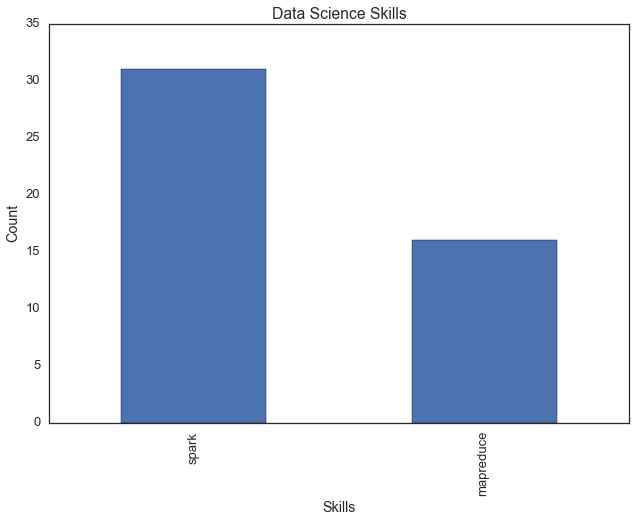

In [41]:
pseries = pd.Series(skill_set)
pseries.sort(ascending=False)

pseries.plot(kind = 'bar')
## set the title to Score Comparison
plt.title('Data Science Skills')
plt.xlabel('Skills')
plt.ylabel('Count')
plt.show()

Some more regular expressions:
=================

Another Example
================

Designed by Katharine Jarmul
----------------------------

https://github.com/kjam/python-web-scraping-tutorial




Scraping Happy Hours
====================

Scrape the happy hour list of LA for personal preferences

http://www.downtownla.com/3_10_happyHours.asp?action=ALL

This example is part of her talk about data scraping at PyCon2014. She is a really good speaker and I enjoyed watching her talk. Check it out: http://www.youtube.com/watch?v=p1iX0uxM1w8

In [42]:
stuff_i_like = ['burger', 'sushi', 'sweet potato fries', 'BBQ','beer']
found_happy_hours = []
my_happy_hours = []
# First, I'm going to identify the areas of the page I want to look at
url = 'http://www.downtownla.com/3_10_happyHours.asp?action=ALL'
source = urllib2.urlopen(url).read()
tables = bs4.BeautifulSoup(source)

In [43]:
# Then, I'm going to sort out the *exact* parts of the page
# that match what I'm looking for...
for t in tables.findAll('p', {'class': 'calendar_EventTitle'}):
    text = t.text
    for s in t.findNextSiblings():
        text += '\n' + s.text
    found_happy_hours.append(text)

print "The scraper found %d happy hours!" % len(found_happy_hours)

The scraper found 63 happy hours!


In [44]:
# Now I'm going to loop through the food I like
# and see if any of the happy hour descriptions match
for food in stuff_i_like:
    for hh in found_happy_hours:
        # checking for text AND making sure I don't have duplicates
        if food in hh and hh not in my_happy_hours:
            print "YAY! I found some %s!" % food
            my_happy_hours.append(hh)

print "I think you might like %d of them, yipeeeee!" % len(my_happy_hours)

YAY! I found some burger!
YAY! I found some burger!
YAY! I found some sushi!
YAY! I found some sushi!
YAY! I found some beer!
YAY! I found some beer!
YAY! I found some beer!
YAY! I found some beer!
YAY! I found some beer!
YAY! I found some beer!
YAY! I found some beer!
YAY! I found some beer!
I think you might like 12 of them, yipeeeee!


In [45]:
# Now, let's make a mail message we can read:
message = 'Hey Katharine,\n\n\n'
message += 'OMG, I found some stuff for you in Downtown, take a look.\n\n'
message += '==============================\n'.join(my_happy_hours)
message = message.encode('utf-8')
# To read more about encoding:
# http://diveintopython.org/xml_processing/unicode.html
message = message.replace('\t', '').replace('\r', '')
message += '\n\nXOXO,\n Your Py Script'

#print message

Getting Data with an API
=========================

* API: application programming interface
* some sites try to make your life easier
* Twitter, New York Times, ImDB, rotten Tomatoes, Yelp, ...

Rotten Tomatoes
===============

![The Wizard of Oz](images/wiz_oz.png "The wizard of Oz")

http://www.rottentomatoes.com/top/


API keys
=========

* required for data access
* identifies application (you)
* monitors usage
* limits rates

Rotten Tomatoes Key
===================

http://developer.rottentomatoes.com/member/register

In [59]:
import json
import requests

api_key = rottenTomatoes_key()

url = 'http://api.rottentomatoes.com/api/public/v1.0/lists/dvds/top_rentals.json?apikey=' + api_key
data = urllib2.urlopen(url).read()
#print data

JSON
======

* JavaScript Object Notation
* human readable
* transmit attribute-value pairs

In [82]:
a = {'a': 1, 'b':2}
s = json.dumps(a)
a2 = json.loads(s)

## a is a dictionary
print a
## vs s is a string containing a in JSON encoding
print s
## reading back the keys are now in unicode
print a2

{'a': 1, 'b': 2}
{"a": 1, "b": 2}
{u'a': 1, u'b': 2}


In [70]:
## create dictionary from JSON 
dataDict = json.loads(data)

## explore dictionary
print "Starting keys:"
print dataDict.keys()
print

## there is a key named `movies` containing a list of movies as a value
movies = dataDict['movies']

## each element of the list `movies` is a dictionary
print "Movie keys:"
print movies[0].keys()
print

Starting keys:
[u'movies', u'link_template', u'links']

Movie keys:
[u'ratings', u'links', u'title', u'critics_consensus', u'release_dates', u'abridged_cast', u'synopsis', u'mpaa_rating', u'year', u'alternate_ids', u'posters', u'runtime', u'id']



In [71]:
## one of the keys is called `ratings`
## the value is yet another dictionary
print "Movie rating keys:"
print movies[0]['ratings'].keys()
print

## so we made it all the way to find the critics score
print "Movie critics score rating:"
print movies[0]['ratings']['critics_score']
print

Movie rating keys:
[u'critics_score', u'audience_score', u'critics_rating', u'audience_rating']

Movie critics score rating:
30



Quiz
=====

* build a list with critics scores
* build a list with audience scores

In [49]:
# critics scores list
critics_scores = [m['ratings']['critics_score'] for m in movies]

# audience scores list
audience_scores = [m['ratings']['audience_score'] for m in movies]

The following code shows how to create a pandas data frame with the data we gathered from the webpage.
Beware of the `set_index()` function in pandas. Per default it does not change the actual data frame! You need to either reassign the output or set the `inplace` argument to `True`.

In [50]:
## create pandas data frame with critics and audience score
scores = pd.DataFrame(data=[critics_scores, audience_scores]).transpose()
scores.columns = ['critics', 'audience']

## also create a list with all movie titles
movie_titles = [m['title'] for m in movies]

## set index of dataFrame BEWARE of inplace!
scores.set_index([movie_titles])

## the line above does not changes scores!
## You need to either reassign

scores = scores.set_index([movie_titles])

## or set the inplace argument to True
scores.set_index([movie_titles], inplace=True)
scores.head(3)

critics  audience
Insurgent                30        62
Mad Max: Fury Road       97        88
Home                     45        65

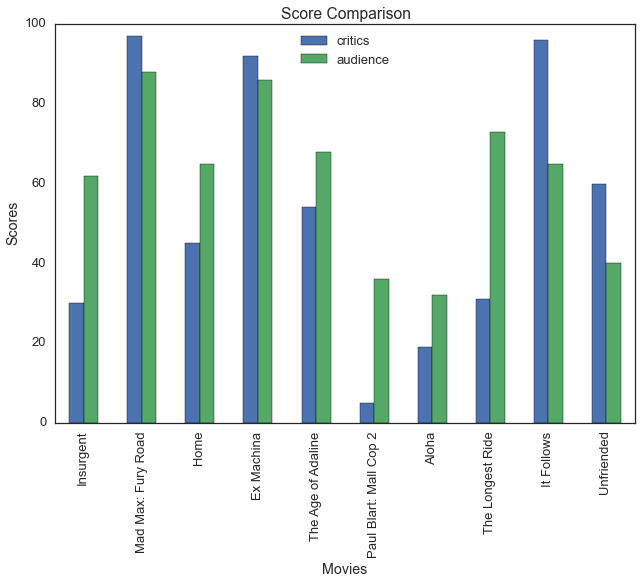

In [51]:
## create a bar plot with the data
## notice that we are using the data frame itself and call its plot function
scores.plot(kind = 'bar')

## set the title to Score Comparison
plt.title('Score Comparison')

## set the x label
plt.xlabel('Movies')

## set the y label
plt.ylabel('Scores')

In [52]:
## show the plot
plt.show()

Twitter Example:
================

* API a bit more complicated
* libraries make life easier
* python-twitter

https://github.com/bear/python-twitter

What we are going to do is scrape Joe's twitter account, and then filter it for the interesting tweets. Defining interesting as tweets that have be re-tweeted at least 10 times. 


In [53]:
import twitter

## define the necessary keys
cKey = twitterAPI_key()
cSecret = twitterAPI_secret()
aKey = twitterAPI_access_token_key()
aSecret = twitterAPI_access_token_secret()

## create the api object with the twitter-python library
api = twitter.Api(consumer_key=cKey, consumer_secret=cSecret, access_token_key=aKey, access_token_secret=aSecret)


In [54]:
## get the user timeline with screen_name = 'stat110'
twitter_statuses = api.GetUserTimeline(screen_name = 'stat110')

## create a data frame
## first get a list of panda Series or dict
pdSeriesList = [pd.Series(t.AsDict()) for t in twitter_statuses]

## then create the data frame
data = pd.DataFrame(pdSeriesList)

data.head(2)

created_at  favorite_count favorited hashtags  \
0  Mon Sep 07 22:17:04 +0000 2015               2     False      NaN   
1  Mon Sep 07 18:51:12 +0000 2015             NaN     False      NaN   

                   id in_reply_to_screen_name  in_reply_to_status_id  \
0  641012335738421248              lallen1618           6.409978e+17   
1  640960524784640001            albertocairo           6.409594e+17   

   in_reply_to_user_id lang media  retweet_count retweeted retweeted_status  \
0           2355874964   en   NaN            NaN     False              NaN   
1             34255829   en   NaN            NaN     False              NaN   

                                              source  \
0  <a href="http://twitter.com" rel="nofollow">Tw...   
1  <a href="http://twitter.com/download/iphone" r...   

                                                text truncated urls  \
0  @lallen1618 @wzchen @AriBFriedman Good luck wi...     False  NaN   
1  @albertocairo @Sulliview @NateSilver538 But a ...     False  NaN   

                                                user  \
0  {u'id': 184543773, u'profile_sidebar_fill_colo...   
1  {u'id': 184543773, u'profile_sidebar_fill_colo...   

                                       user_mentions  
0  [{u'screen_name': u'lallen1618', u'id': 235587...  
1  [{u'screen_name': u'albertocairo', u'id': 3425...

In [55]:
## filter tweets with enough retweet_count
maybe_interesting = data[data.retweet_count>20]

## get the text of these tweets
tweet_text = maybe_interesting.text

## print them out
text = tweet_text.values

for t in text:
    print '######'
    print t

######
RT @NateSilver538: .@Sulliview: The fundamental sin is cherry-picking evidence to fit a narrative. Can happen in both "reported" and "data-…
######
RT @Agent_Analytics: Watch out #datascientist 's. Always read the #job decscription. #data #DataScience #BigData #analytics #jokes http://t…
######
RT @rasbt: just felt like writing this morning ;) "Python, Machine Learning &amp; Language Wars. A Highly Subjective Point of View" http://t.co…
######
RT @ericcolson: Linear Algebra: took this course by G Strang years ago. Excellent and free! via @ajinkyakale 
http://t.co/UAqeHMzs4a http:/…


Extracting columns:
===================

__Warning:__ The returned column `tweet_text` is a `view` on the data
    
* it is not a copy
* you change the Series => you change the DataFrame

Below is another example of such a view:

In [56]:
## create a view for favorite_count on maybe_interesting
view = maybe_interesting['favorite_count']
print '-----------------'
print "This is view:"
print view
## change a value
view[8] = 9999

## look at original frame
print '-----------------'
print "This is view after changing view[8]"
print view

print '-----------------'
print "This is maybe_interesting after changing view[8]"
print "It changed too!"
print maybe_interesting['favorite_count']

## to avoid this you can use copy
independent_data = maybe_interesting['favorite_count'].copy()
independent_data[10] = 999
print '-----------------'
print "This is independent_data after changed at 10:"
print independent_data
print '-----------------'
print "This is maybe_interesting after changing independent_data:"
print "It did not change because we only changed a copy of it"
print maybe_interesting['favorite_count']

C:\Python27\lib\site-packages\ipykernel\__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Python27\lib\site-packages\pandas\core\series.py:664: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.loc[key] = value


-----------------
This is view:
3   NaN
5   NaN
6   NaN
7   NaN
Name: favorite_count, dtype: float64
-----------------
This is view after changing view[8]
3     NaN
5     NaN
6     NaN
7     NaN
8    9999
Name: favorite_count, dtype: float64
-----------------
This is maybe_interesting after changing view[8]
It changed too!
3     NaN
5     NaN
6     NaN
7     NaN
8    9999
Name: favorite_count, dtype: float64
-----------------
This is independent_data after changed at 10:
3      NaN
5      NaN
6      NaN
7      NaN
8     9999
10     999
Name: favorite_count, dtype: float64
-----------------
This is maybe_interesting after changing independent_data:
It did not change because we only changed a copy of it
3     NaN
5     NaN
6     NaN
7     NaN
8    9999
Name: favorite_count, dtype: float64


C:\Python27\lib\site-packages\IPython\core\interactiveshell.py:3066: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


What we covered today:
============

* Pandas data frames
* Guidelines for friendly scraping
* Scraping html sites
* Scraping with Api's
* Basic data cleanup


Further material
================

* I highly recommend Katharine Jarmul's scraping tutorials
* For example [this one](https://www.youtube.com/watch?v=p1iX0uxM1w8)
* Pandas has extensive [documentation](http://pandas.pydata.org/pandas-docs/stable/)
* Especially the [tem minutes to pandas chapter](http://pandas.pydata.org/pandas-docs/stable/10min.html)

* [Greg Reda](http://www.gregreda.com/2013/10/26/using-pandas-on-the-movielens-dataset/) did a lot more pandas examples for the movie lens data set

## This is the lecture note for day 5.
## Topics covered

- Collect structured data
  
    - Introduce HTTP
    - How to use request library to make HTTP requests 
    - How to use json library 
    - Workshop: structured data collection using APIs
        - twitter API, rotten tomatoes API, aws api, philips hue, slack API, http://swapi.co

- Collect unstructured data

    - HTML syntax
    - Robots.txt
    - Useful Tags (HTML)
    - urllib2 (library to make a http request) 
    - beautiful soup library 
        - http://www.crummy.com/software/BeautifulSoup
    - Excercise: scraping data science skills
        - www.indeed.com
        - Exercise on scraping product information on Lazada website
            - Collect all the product belong to a certain category

# Collect Structured Data

## Introduction to HTTP (Hypertext Transfer Protocol)

* application-level network protocol for distributed, collaborative, hypermedia information systems.
* foundation for data communication and delivers virtually all files and other data on the World Wide Web (www.)

## How to request library to make HTTP request

In [4]:
import requests

r = requests.get("http://example.com/foo/bar")
print r.status_code
print r.headers
print r.content

404
{'Content-Length': '606', 'X-Cache': '404-HIT', 'Content-Encoding': 'gzip', 'Expires': 'Fri, 12 May 2017 12:33:10 GMT', 'Vary': 'Accept-Encoding', 'Server': 'ECS (cpm/F9A1)', 'Last-Modified': 'Sun, 30 Apr 2017 08:19:59 GMT', 'Cache-Control': 'max-age=604800', 'Date': 'Fri, 05 May 2017 12:33:10 GMT', 'Content-Type': 'text/html'}
<!doctype html>
<html>
<head>
    <title>Example Domain</title>

    <meta charset="utf-8" />
    <meta http-equiv="Content-type" content="text/html; charset=utf-8" />
    <meta name="viewport" content="width=device-width, initial-scale=1" />
    <style type="text/css">
    body {
        background-color: #f0f0f2;
        margin: 0;
        padding: 0;
        font-family: "Open Sans", "Helvetica Neue", Helvetica, Arial, sans-serif;
        
    }
    div {
        width: 600px;
        margin: 5em auto;
        padding: 50px;
        background-color: #fff;
        border-radius: 1em;
    }
    a:link, a:visited {
        color: #38488f;
        text-decor

## How to use JSON library

* JSON is a lightweight data-interchange format which is easy for humans to read and write and easy for machines to parse and generate. 

* Using JSON, we can store and exchage data just as many web applications do.

* JSON library parses JSON from files, strings, dictionary, list in Python and vice versa. 

In [8]:
# Reading JSON -> parsing JSON into Python

import json
import urllib2

urlData = "http://"
#Open URL and read the data
webUrl = urllib2.urlopen(urlData)

# function to parse JSON information into native Python object
def printResults(data):
    theJSON = json.loads(data)


{u'age': 39, u'name': u'Frank'}


## Workshop: structured data collection using APIs

* twitter API, rotten tomatoes API, aws api, philips hue, slack API, http://swapi.co

# Collect Unstructured Data

## HTML syntax

## Robots.txt

## HTML - Useful tags 

In [ ]:
# Heading tag
<h1> content </h1>
# Paragraph tag
<p> content </p>
# Emphasize (italicised)
<em> content </em>



## urllib2 

## beautiful soup library

* http://www.crummy.com/software/BeautifulSoup 

## Excercise: Scraping data science skills

* http://www.indeed.com

* Exercise on scraping product information on Lazada website
    * Collect all the product belong to a certain category